# FIT5196 Assessment 3
#### Student Name: Dawei Gu
#### Student ID: 29910226
Tutorial Section: FIT5196 Tutorial 12

Tutor: Islam Nassar

Start Date: 22/05/2019

Last Modified Date: 01/06/2019

Environment: Python 3.7 and Anaconda 2018.12 (64-bit)

Libraries used: pandas,datetime, geopy, math, sklearn, matplotlib, geopandas, shapely 

In [1]:
import pandas as pd
import datetime as dt
from geopy.distance import geodesic
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import geopandas
import shapely.geometry as geometry

In [2]:
#read file into dataframe
house = pd.read_csv('29910226.csv')
house.head()

ID             Address  Rooms Type      Price        Date  \
0  ID524428873     14 Woodmason St      3    h  1437000.0  16/04/2016   
1  ID455142191       85 Radford Rd      5    h   791000.0  18/06/2016   
2  ID385314378       34 Fewster Dr      3    h   970000.0  26/08/2017   
3  ID205782381      41 Adelaide St      3    h   760000.0  23/09/2017   
4  ID574190434  1/221 Westgarth St      3    t   865000.0  12/11/2016   

   Bathroom  Car  Landsize    Age  Lattitude  Longtitude  
0       1.0  1.0     313.0  109.0  -37.85110   145.03170  
1       3.0  1.0     961.0   34.0  -37.70240   144.98400  
2       2.0  2.0     674.0   38.0  -37.88360   145.22805  
3       1.0  1.0     697.0   69.0  -37.78036   144.81950  
4       1.0  2.0     184.0   13.0  -37.78250   145.01040

In [3]:
# checking for duplicated data
house[house.duplicated()]

ID                 Address  Rooms Type      Price        Date  \
58   ID227991548          33 Mountain St      2    h  1150000.0   7/05/2016   
80   ID758306752        43 Ballantyne St      2    h   925000.0  24/09/2016   
202  ID946117206          10/3 Allard St      1    u   275000.0  15/07/2017   
218  ID386128852          114 Reynard St      3    h  1064000.0   8/10/2016   
261  ID155519306              2 Hazel St      5    h  2125000.0  28/05/2016   
282  ID636472299        23/530 Toorak Rd      2    u   511000.0  27/06/2016   
345  ID650392186        2/41 Kangaroo Rd      3    u  1220500.0  24/06/2017   
429  ID469847752        8/37 Victoria St      2    u   740000.0   8/04/2017   
543  ID880656809            56 Pecham St      3    h   621000.0  22/04/2017   
553  ID472390759         301/89 River St      2    u   930000.0   3/09/2016   
563  ID236752982           76 Ogilvie St      3    h   960000.0   4/03/2017   
571  ID470285370        1/36 Pleasant Rd      4    t  1738000.0  15/10/2016   
577  ID707383464             25 Hardy St      4    h  1500000.0   3/12/2016   
585  ID337914978         1/36 The Avenue      2    u   585000.0  15/07/2017   
592  ID968176576           59 Sellars St      3    h   850000.0  22/07/2017   
608  ID282152385            73 Pecham St      3    h   963500.0  27/05/2017   
633  ID589073637             141 Gold St      2    h   845500.0   7/05/2016   
650  ID384557170          7 Fairbairn Rd      3    h   520000.0   3/06/2017   
670  ID630270562              4 Tudor Rd      5    h  1540500.0   9/09/2017   
671  ID389916108            44 Severn St      3    h  1930000.0  10/12/2016   
674  ID521656880             239 Punt Rd      3    h  1570000.0  27/06/2016   
698  ID637311098         3/302 Grange Rd      2    u   405000.0  28/08/2016   
700  ID631497594               4 Ella Ct      4    h  1300000.0   8/04/2017   
701  ID713631606              71 Hume Av      4    h   410000.0   9/09/2017   
702  ID198657690         25 Faversham Rd      4    h  2510000.0  13/05/2017   
703  ID877736099          13 Rosemary Dr      3    h   572000.0  27/05/2017   
704  ID337914978         1/36 The Avenue      2    u   585000.0  15/07/2017   
705  ID828387705         13 McDougall St      2    h   619000.0  13/08/2016   
706  ID286614327           11 Rebecca Cl      5    h   835500.0  29/07/2017   
707  ID187135066         39 Wilkinson St      2    h   800000.0   3/09/2017   
708  ID582089114             3 Speers Ct      4    h  1600000.0  19/08/2017   
709  ID634535284        35 Finningley Dr      3    h   695000.0  27/05/2017   
710  ID158999276             124 Cole St      4    h  1761000.0   6/08/2016   
711  ID474719080            14 Arthur St      2    h  1065000.0  15/10/2016   
712  ID550141293        1A Aberfeldie St      3    h  1195000.0   9/09/2017   
713  ID494300549           37 Roberts St      3    h   891000.0  18/06/2016   
714  ID754507287        416 Serpells Tce      4    h  1200000.0  19/08/2017   
715  ID428230767       1/6 Corhampton Rd      3    u  1600000.0  29/07/2017   
716  ID512732811  11/1051 Pascoe Vale Rd      2    u   280000.0  16/04/2016   
717  ID309630222             7 Eaglet Ct      4    h   720000.0   3/06/2017   
718  ID354076401              8 Norma Ct      3    h   850000.0   3/09/2016   
719  ID959679005         15 Kingshott Cl      4    h  1500000.0  29/04/2017   

     Bathroom  Car  Landsize    Age  Lattitude  Longtitude  
58        1.0  0.0     113.0  163.0  -37.83730   144.94930  
80        1.0  1.0     258.0   49.0  -37.75840   144.99710  
202       1.0  1.0    1388.0   49.0  -37.76840   144.94214  
218       2.0  1.0     417.0   79.0  -37.74780   144.95830  
261       3.0  2.0     603.0   39.0  -37.84370   145.06900  
282       1.0  2.0       0.0   49.0  -37.84240   145.01840  
345       2.0  2.0     462.0   54.0  -37.89767   145.07332  
429       1.0  1.0       0.0   59.0  -37.88810   145.00970  
543       1.0  1.0     694.0   49.0  -37.69770   144.91160  
553   

In [4]:
# Since there is duplicated data, drop the duplicated data
house = house.drop_duplicates()
len(house)

678

In [5]:
# Since some rows have been dropped, so reset index
house= house.reset_index()
del house['index']
house.head()

ID             Address  Rooms Type      Price        Date  \
0  ID524428873     14 Woodmason St      3    h  1437000.0  16/04/2016   
1  ID455142191       85 Radford Rd      5    h   791000.0  18/06/2016   
2  ID385314378       34 Fewster Dr      3    h   970000.0  26/08/2017   
3  ID205782381      41 Adelaide St      3    h   760000.0  23/09/2017   
4  ID574190434  1/221 Westgarth St      3    t   865000.0  12/11/2016   

   Bathroom  Car  Landsize    Age  Lattitude  Longtitude  
0       1.0  1.0     313.0  109.0  -37.85110   145.03170  
1       3.0  1.0     961.0   34.0  -37.70240   144.98400  
2       2.0  2.0     674.0   38.0  -37.88360   145.22805  
3       1.0  1.0     697.0   69.0  -37.78036   144.81950  
4       1.0  2.0     184.0   13.0  -37.78250   145.01040

In [6]:
#Extract the year data of house sold for future use
year_data = []
for index in range(len(house)):
    year_data.append(pd.to_datetime(house.loc[index,'Date']).year)
house['year'] = year_data

## Task 1: Data Integration

### 1.1 Suburb

In [7]:
#reading suburb shapefile as dataframe 
suburb = geopandas.read_file("vic_suburb_boundary\VIC_LOCALITY_POLYGON_shp.shp")
suburb.head()

LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_2  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2017-08-09       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  \
0       None       None          G       None          2   
1       None       None          G       None          2   
2       None       None          G       None          2   
3       None       None          G       None          2   
4       None       None          G       None          2   

                                            geometry  
0  POLYGON ((141.74552399 -35.07228701, 141.74552...  
1  POLYGON ((148.668767 -37.39571245, 148.6687620...  
2  POLYGON ((142.92287999 -37.97885997, 142.90449...  
3  POLYGON ((147.82335712 -37.66000897, 147.82312...  
4  POLYGON ((141.279783 -35.99858911, 141.2798853...

In [8]:
#rename the VIC_LOCA_2 column to suburb for easy interprete in furture, and the geometry column is the ploygon data of suburb
suburb.rename(columns={'VIC_LOCA_2':'suburb'}, inplace = True)
suburb.head()

LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1     suburb  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2017-08-09       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  \
0       None       None          G       None          2   
1       None       None          G       None          2   
2       None       None          G       None          2   
3       None       None          G       None          2   
4       None       None          G       None          2   

                                            geometry  
0  POLYGON ((141.74552399 -35.07228701, 141.74552...  
1  POLYGON ((148.668767 -37.39571245, 148.6687620...  
2  POLYGON ((142.92287999 -37.97885997, 142.90449...  
3  POLYGON ((147.82335712 -37.66000897, 147.82312...  
4  POLYGON ((141.279783 -35.99858911, 141.2798853...

In [9]:
#Matching the latitude and longitude of house to the geometry column of suburb dataset 
house['Suburb']='not available'
for i in range(len(house)):
    location = house.loc[i,'Longtitude'],house.loc[i,'Lattitude']
    print(i)
    for j in range(len(suburb)):
        if geometry.Point(location).within(geometry.shape(suburb.loc[j,'geometry'])):
            house.loc[i,'Suburb'] = suburb.loc[j,'suburb']
            print(suburb.loc[j,'suburb'])
            break

0
MALVERN
1
RESERVOIR
2
WANTIRNA SOUTH
3
ALBION
4
NORTHCOTE
5
GLENROY
6
BRUNSWICK WEST
7
MITCHAM
8
KEW EAST
9
MILL PARK
10
THORNBURY
11
MOUNT WAVERLEY
12
MITCHAM
13
MARIBYRNONG
14
CAMBERWELL
15
FITZROY
16
SOUTH MELBOURNE
17
TOORAK
18
ESSENDON WEST
19
COLLINGWOOD
20
FOOTSCRAY
21
IVANHOE
22
ABBOTSFORD
23
BRUNSWICK WEST
24
WEST MELBOURNE
25
BUNDOORA
26
VERMONT SOUTH
27
ELWOOD
28
SOUTH YARRA
29
HAMPTON
30
BENTLEIGH EAST
31
COBURG
32
OAKLEIGH
33
BALWYN NORTH
34
CRAIGIEBURN
35
BRIGHTON
36
HAMPTON
37
HAMPTON
38
ABERFELDIE
39
HAWTHORN EAST
40
THOMASTOWN
41
ESSENDON
42
ESSENDON NORTH
43
MAIDSTONE
44
RICHMOND
45
IVANHOE
46
RESERVOIR
47
KEILOR EAST
48
ESSENDON WEST
49
WILLIAMSTOWN
50
ASCOT VALE
51
BRUNSWICK WEST
52
ESSENDON
53
PRAHRAN
54
AVONDALE HEIGHTS
55
NORTHCOTE
56
BUNDOORA
57
VIEWBANK
58
COBURG
59
DINGLEY VILLAGE
60
RESERVOIR
61
FITZROY NORTH
62
NORTHCOTE
63
ALTONA
64
BRUNSWICK WEST
65
MAIDSTONE
66
ALTONA
67
PRAHRAN
68
KEILOR DOWNS
69
CAULFIELD SOUTH
70
BENTLEIGH
71
WEST FOOTSCRAY
72
SEDDON

HILLSIDE
561
KENSINGTON
562
ALBERT PARK
563
EPPING
564
YARRAVILLE
565
HILLSIDE
566
PRAHRAN
567
MITCHAM
568
BRUNSWICK
569
ASHWOOD
570
ESSENDON
571
RICHMOND
572
SYDENHAM
573
MELBOURNE
574
ARMADALE
575
RESERVOIR
576
TOORAK
577
SURREY HILLS
578
NORTHCOTE
579
FLEMINGTON
580
YARRAVILLE
581
FOOTSCRAY
582
HADFIELD
583
CHADSTONE
584
MURRUMBEENA
585
WILLIAMSTOWN
586
ABERFELDIE
587
BURNLEY
588
GLENROY
589
HAWTHORN
590
HUGHESDALE
591
PARKVILLE
592
WEST FOOTSCRAY
593
HAWTHORN EAST
594
DOVETON
595
ALBERT PARK
596
DONCASTER EAST
597
ALTONA NORTH
598
ROSANNA
599
BALWYN NORTH
600
NORTHCOTE
601
CRAIGIEBURN
602
ARMADALE
603
SUNSHINE NORTH
604
KEILOR EAST
605
SOUTH MORANG
606
MENTONE
607
RICHMOND
608
DONCASTER EAST
609
JACANA
610
HILLSIDE
611
KEW
612
HEIDELBERG HEIGHTS
613
THORNBURY
614
SOUTH MELBOURNE
615
ASHWOOD
616
MOONEE PONDS
617
JACANA
618
ASHBURTON
619
KEW
620
PARKDALE
621
BRIGHTON EAST
622
SOUTH YARRA
623
CARNEGIE
624
BRIGHTON
625
PORT MELBOURNE
626
IVANHOE
627
BALWYN
628
JACANA
629
NEWPORT
630
EL

In [10]:
# Check is there no matching in house dataframe
house[house['Suburb'] == 'not available']

Empty DataFrame
Columns: [ID, Address, Rooms, Type, Price, Date, Bathroom, Car, Landsize, Age, Lattitude, Longtitude, year, Suburb]
Index: []

### 1.2 over_priced

In [11]:
#Define a function to compare the price of house with the median price of same situation of house, if the price is higher than median price, 
# return True. If the price is lower or equal to median price, return False. If other situation, return -1.
def compare_price(room, house_type, bathroom,car, sold_year,surb,price):
    try:
        median_price = house[(house['Rooms']==room)&(house['Type']==house_type)&(house['Bathroom']==bathroom)&
                             (house['Car']==car)&(house['year']==sold_year)&(house['Suburb']==surb)]['Price'].median()
        if price > median_price:
            result = 1
        elif price <= median_price:
            result = 0
    except Exception as ex:
        result = -1
    finally:
        return result

In [12]:
# Apply function to hosue data, and creat column called 'over_periced' to store result. 
over_priced=[]
for i in range(len(house)):
    over_priced.append(compare_price(house.loc[i,'Rooms'],house.loc[i,'Type'],house.loc[i,'Bathroom'],house.loc[i,'Car']
                                    ,house.loc[i,'year'],house.loc[i,'Suburb'],house.loc[i,'Price'] ))
house['over_priced?'] = over_priced

In [13]:
# Check the result
house['over_priced?'].value_counts()

0    632
1     46
Name: over_priced?, dtype: int64

### 1.3 Crime_data

In [14]:
#Read the council file to get the area suburb data as a list
def reading_file(file_path):
    file_handle = open(file_path, "r")
    list_data = []
    for line in file_handle:
        #first part is area
        first_item = line.strip().split(":")[0]
        #second part is suburb list of that area
        temp_second_item = line.strip().split(":")[1].replace('[','').replace(']','').split(',')
        second_item = []
        for item in temp_second_item:
            #remove extra '' inside each suburb string, and make string to upper case
            second_item.append(eval(item).upper())
        list_data.append([first_item,second_item])  
    file_handle.close
    return list_data
council = reading_file('councils.txt')
council[0:10]

[['BANYULE ', ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON']],
 ['BRIMBANK ', ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE']],
 ['DAREBIN ', ['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA']],
 ['HOBSONS BAY ', ['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST']],
 ['HUME ', ['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST']],
 ['MARIBYRNONG ', ['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD']],
 ['MELBOURNE ', ['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE']],
 ['MELTON ', ['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE']],
 ['MOONEE VALLEY ', ['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD']],
 ['MORELAND ', ['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD']]]

In [15]:
#determine the area of each house located
def found_area(suburb):
    result = 'unknown'
    try:
        for i in range(len(council)):
            # check each area, check the suburb is in area's suburb list or not, match return area name
            if suburb in council[i][1]:
                result = council[i][0]
    except Exception as ex:
        result = 'unknown'
    finally:
        return result
house['area'] = house['Suburb'].apply(found_area)
house.head(5)

ID             Address  Rooms Type      Price        Date  \
0  ID524428873     14 Woodmason St      3    h  1437000.0  16/04/2016   
1  ID455142191       85 Radford Rd      5    h   791000.0  18/06/2016   
2  ID385314378       34 Fewster Dr      3    h   970000.0  26/08/2017   
3  ID205782381      41 Adelaide St      3    h   760000.0  23/09/2017   
4  ID574190434  1/221 Westgarth St      3    t   865000.0  12/11/2016   

   Bathroom  Car  Landsize    Age  Lattitude  Longtitude  year  \
0       1.0  1.0     313.0  109.0  -37.85110   145.03170  2016   
1       3.0  1.0     961.0   34.0  -37.70240   144.98400  2016   
2       2.0  2.0     674.0   38.0  -37.88360   145.22805  2017   
3       1.0  1.0     697.0   69.0  -37.78036   144.81950  2017   
4       1.0  2.0     184.0   13.0  -37.78250   145.01040  2016   

           Suburb  over_priced?             area  
0         MALVERN             0         BAW BAW   
1       RESERVOIR             0  EAST GIPPSLAND   
2  WANTIRNA SOUTH             0          LODDON   
3          ALBION             1           MOIRA   
4       NORTHCOTE             0     MURRINDINDI

In [16]:
# Check the area result
len(house[(house['area']=='unknown')])

0

In [17]:
#Read the crime file
xls = pd.ExcelFile('crimebylocationdatatable-yearending31march2016.xlsx')
crime = pd.read_excel(xls, 'Table 1')
crime

Unnamed: 0                                         Unnamed: 1  \
0            NaN                                                NaN   
1            NaN                                                NaN   
2            NaN                                                NaN   
3            NaN                                                NaN   
4            NaN                                                NaN   
5            NaN                                                NaN   
6            NaN                                                NaN   
7            NaN                                                NaN   
8            NaN                                                NaN   
9            NaN  Table 1. Number of offences by geographic area...   
10           NaN                                                NaN   
11           NaN                                                NaN   
12           NaN                                                NaN   
13           NaN                                                NaN   
14           NaN                                                NaN   
15           NaN                                                NaN   
16           NaN                                                NaN   
17           NaN                                                NaN   
18           NaN                         Apr - Mar reference period   
19           NaN                                               2012   
20           NaN                                               2012   
21           NaN                                               2012   
22           NaN                                               2012   
23           NaN                                               2012   
24           NaN                                               2012   
25           NaN                                               2012   
26           NaN                                               2012   
27           NaN                                               2012   
28           NaN                                               2012   
29           NaN                                               2012   
...          ...                                                ...   
9074         NaN                                               2016   
9075         NaN                                               2016   
9076         NaN                                               2016   
9077         NaN                                               2016   
9078         NaN                                               2016   
9079         NaN                                               2016   
9080         NaN                                               2016   
9081         NaN                                               2016   
9082         NaN                                               2016   
9083         NaN                                               2016   
9084         NaN                                               2016   
9085         NaN                                               2016   
9086         NaN                                               2016   
9087         NaN                                               2016   
9088         NaN                                               2016   
9089         NaN                                               2016   
9090         NaN                                               2016   
9091         NaN                                               2016   
9092         NaN                                               2016   
9093         NaN                                               2016   
9094         NaN                                               2016   
9095         NaN                                               2016   
9096         NaN                                               2016   
9097         NaN                                               2016   
9098         NaN              

In [18]:
# Since the first column is all null value, so drop the first column, drop all of the row with null value
del crime['Unnamed: 0']
crime.dropna(axis=0,inplace=True)
crime.head()

Unnamed: 1          Unnamed: 2           Unnamed: 3  \
18  Apr - Mar reference period       Police Region  Police Service Area   
19                        2012  1 North West Metro              BANYULE   
20                        2012  1 North West Metro              BANYULE   
21                        2012  1 North West Metro              BANYULE   
22                        2012  1 North West Metro              BANYULE   

               Unnamed: 4                   Unnamed: 5  \
18  Local Government Area         CSA Offence Division   
19                BANYULE  A Crimes against the person   
20                BANYULE  A Crimes against the person   
21                BANYULE  A Crimes against the person   
22                BANYULE  A Crimes against the person   

                            Unnamed: 6     Unnamed: 7 Unnamed: 8  \
18             CSA Offence Subdivision  Offence Count    LGA ERP   
19   A10 Homicide and related offences              4     123600   
20    A20 Assault and related offences            568     123600   
21                 A30 Sexual offences            132     123600   
22  A40 Abduction and related offences             12     123600   

       Unnamed: 9  
18  Victorian ERP  
19        5632521  
20        5632521  
21        5632521  
22        5632521

In [19]:
#Rename the column we may need, and drop the first row contain column name
crime.rename(columns={'Unnamed: 1':'year', 'Unnamed: 3':'police_area', 'Unnamed: 4':'government_area', 
                      'Unnamed: 5':'type', 'Unnamed: 7':'count'}, inplace = True)
crime.drop([18], axis=0,inplace=True)

In [20]:
# reset the index, and drop the orignal index column
crime= crime.reset_index()
del crime['index']
crime.head()

year          Unnamed: 2 police_area government_area  \
0  2012  1 North West Metro     BANYULE         BANYULE   
1  2012  1 North West Metro     BANYULE         BANYULE   
2  2012  1 North West Metro     BANYULE         BANYULE   
3  2012  1 North West Metro     BANYULE         BANYULE   
4  2012  1 North West Metro     BANYULE         BANYULE   

                          type                          Unnamed: 6 count  \
0  A Crimes against the person   A10 Homicide and related offences     4   
1  A Crimes against the person    A20 Assault and related offences   568   
2  A Crimes against the person                 A30 Sexual offences   132   
3  A Crimes against the person  A40 Abduction and related offences    12   
4  A Crimes against the person                         A50 Robbery    46   

  Unnamed: 8 Unnamed: 9  
0     123600    5632521  
1     123600    5632521  
2     123600    5632521  
3     123600    5632521  
4     123600    5632521

In [21]:
# Extract the crime type of each record
crime_type = []
for i in range(len(crime)):
    crime_type.append(crime.iloc[i,4][0])
crime["crime_type"] = crime_type
crime.head()

year          Unnamed: 2 police_area government_area  \
0  2012  1 North West Metro     BANYULE         BANYULE   
1  2012  1 North West Metro     BANYULE         BANYULE   
2  2012  1 North West Metro     BANYULE         BANYULE   
3  2012  1 North West Metro     BANYULE         BANYULE   
4  2012  1 North West Metro     BANYULE         BANYULE   

                          type                          Unnamed: 6 count  \
0  A Crimes against the person   A10 Homicide and related offences     4   
1  A Crimes against the person    A20 Assault and related offences   568   
2  A Crimes against the person                 A30 Sexual offences   132   
3  A Crimes against the person  A40 Abduction and related offences    12   
4  A Crimes against the person                         A50 Robbery    46   

  Unnamed: 8 Unnamed: 9 crime_type  
0     123600    5632521          A  
1     123600    5632521          A  
2     123600    5632521          A  
3     123600    5632521          A  
4     123600    5632521          A

In [22]:
# Function use to found the average number of crime in last 3 year of that area,
def found_crime_count(area, year, crime_type):
    try:
        result = crime[(crime['year']==(year-1))&(crime['government_area']==area)&(crime['crime_type']==crime_type)]['count'].sum()
        result += crime[(crime['year']==(year-2))&(crime['government_area']==area)&(crime['crime_type']==crime_type)]['count'].sum()
        result += crime[(crime['year']==(year-3))&(crime['government_area']==area)&(crime['crime_type']==crime_type)]['count'].sum()
        result = result/3
        if result == 0:
            result = -1
    except Exception as ex:
        result = -1
    finally:
        return int(result)


In [23]:
# Found the average number of type A crime for each row
type_a_crime = []
for i in range(len(house)):
    type_a_crime.append(found_crime_count(house.loc[i,'area'].strip(),house.loc[i,'year'], 'A'))
house['crime_A_average'] = type_a_crime

In [24]:
# check the number of row did not found data
len(house[house['crime_A_average']==-1])

0

In [25]:
house['crime_A_average'].describe()

count     678.000000
mean     1104.637168
std       835.925748
min        50.000000
25%       555.000000
50%       938.000000
75%      1479.000000
max      3767.000000
Name: crime_A_average, dtype: float64

In [26]:
# Found the average number of type B crime for each row
type_b_crime = []
for i in range(len(house)):
    type_b_crime.append(found_crime_count(house.loc[i,'area'].strip(),house.loc[i,'year'], 'B'))
house['crime_B_average'] = type_b_crime

In [27]:
# check the number of row did not found data
len(house[house['crime_B_average']==-1])

0

In [28]:
# Found the average number of type C crime for each row
type_c_crime = []
for i in range(len(house)):
    type_c_crime.append(found_crime_count(house.loc[i,'area'].strip(),house.loc[i,'year'], 'C'))
house['crime_C_average'] = type_c_crime

In [29]:
# check the number of row did not found data
len(house[house['crime_C_average']==-1])

0

In [30]:
# delate the temperate columns
del house['year']
del house['area']

### 1.4 station_id and distance

#### Merge all of the relvent stop file, and relvent stop_times file

First, merge the stop id and stop_times file base on some conditons:
- stop_times file only contain the record for the route have southern cross station
- stop_times file only contain the record for the trip id work in all week day
- stop_time file only contain the record infront of southern cross station(including southern cross station) station to ensure the direction of trip to southern cross station. 
- stop file only contain the stop id from stop_time file and departure bewteen 7:00 - 9:30 am.


In [31]:
#determine the southern cross station is in the stop dataframe or not, is it exist, return the stop id of southern cross station
def found_southern(stop):
    for i in range(len(stop)):
        if ('Southern Cross Railway Station (Melbourne City)'in stop.loc[i,'stop_name']):
            return stop.loc[i,'stop_id']
    return False

In [32]:
# extract the southern cross staiton stop id and route number list which contain southern cross staiton 
SC_id = []
route_list = []
for i in [1,2,3,4,5,6,7,8,10,11]:
    stop_file = pd.read_csv("gtfs/"+str(i)+"/google_transit/stops.txt")
    if found_southern(stop_file)!= False:
        SC_id.append(found_southern(stop_file))
        route_list.append(i)
SC_id = list(set(SC_id))
print(SC_id)
print(route_list)

[20043, 22180]
[1, 2, 10]


In [33]:
#Built the first route fiel into main stop and main time dataframes

# read the calender data to check which service id was only run in the weekday, extract the service_id list
calendar_file = pd.read_csv("gtfs/1/google_transit/calendar.txt")
service_id_list = list(calendar_file[(calendar_file['monday']==1)&(calendar_file['tuesday']==1)&(calendar_file['wednesday']==1)
                                     &(calendar_file['thursday']==1)&(calendar_file['friday']==1)&(calendar_file['saturday']==0)
                                     &(calendar_file['sunday']==0)]['service_id'].unique())

# read the trips file to extract which trip_id is for the service_id list
trips_file = pd.read_csv("gtfs/1/google_transit/trips.txt")
trip_id_list = list(trips_file[trips_file['service_id'].isin(service_id_list)]['trip_id'].unique())

#read stop_time file
raw_time_main = pd.read_csv("gtfs/1/google_transit/stop_times.txt")

#filter the dataframe with the trip_id list only work in the weekday first.
raw_time_main = raw_time_main[raw_time_main['trip_id'].isin(trip_id_list)]
#extract the trip_id have southern cross station included.
SC_trip_id_list = list(raw_time_main[raw_time_main['stop_id'].isin(SC_id)]['trip_id'].unique())

#filtering the dataframe which only contain the station before the southern cross and southern cross, insure all of stop_time and stop record
# is the record that towards southern cross station
time_main = raw_time_main[raw_time_main['trip_id']==SC_trip_id_list[0]]
#found the seuqence number of southern cross station in that trip
SC_trip_seuqence = list(time_main[time_main['stop_id'].isin(SC_id)]['stop_sequence'])[0]
#Only add the sequence number smaller than southern cross station, and also including southern cross
time_main = time_main[time_main['stop_sequence']<= SC_trip_seuqence]
#Remove the fisrt trip
SC_trip_id_list.pop(0)
# Do the same thing to the rest of trip
for i_trip in SC_trip_id_list:
    temp_time_main= raw_time_main[raw_time_main['trip_id']==i_trip]
    SC_trip_seuqence = list(temp_time_main[temp_time_main['stop_id'].isin(SC_id)]['stop_sequence'])[0]
    temp_time_main = temp_time_main[temp_time_main['stop_sequence']<= SC_trip_seuqence]
    # merge this trip record to main
    time_main = pd.concat([time_main, temp_time_main], ignore_index=True)
#extract the stop id which the trip run time between 7:00-9:30.
stop_id_list = time_main[(time_main['departure_time']> '06:59:59')&(time_main['departure_time']< '09:30:01')]['stop_id'].unique()


#Read the stop file
stop_main = pd.read_csv("gtfs/1/google_transit/stops.txt")
#filter stop file with the stop id extract from pervious step
stop_main = stop_main[stop_main['stop_id'].isin(stop_id_list)]


print('stop_main:',len(stop_main))
print('time_main:',len(time_main))

stop_main: 89
time_main: 8572


In [34]:
#Since the first route have been add into main file, remove the first one, and prepare list for reamin
route_list.pop(0)
route_list

[2, 10]

In [35]:
#merge the remain route file
for i in route_list:
    trip_id_list = []
    stop_id_list = []
    trip_id_list = []
    service_id_list= []
    
    # read the calender data to check which service id was only run in the weekday, extract the service_id list
    calendar_file = pd.read_csv("gtfs/"+str(i)+"/google_transit/calendar.txt")
    service_id_list = list(calendar_file[(calendar_file['monday']==1)&(calendar_file['tuesday']==1)&(calendar_file['wednesday']==1)
                                         &(calendar_file['thursday']==1)&(calendar_file['friday']==1)&(calendar_file['saturday']==0)
                                         &(calendar_file['sunday']==0)]['service_id'].unique())
    
    # read the trips file to check which trip_id is for the service_id list
    trips_file = pd.read_csv("gtfs/"+str(i)+"/google_transit/trips.txt")
    trip_id_list = list(trips_file[trips_file['service_id'].isin(service_id_list)]['trip_id'].unique())
    
    #read stop_time file
    raw_time_file = pd.read_csv("gtfs/"+str(i)+"/google_transit/stop_times.txt")
    #filter the dataframe with the trip_id only work in the weekday first.
    raw_time_file = raw_time_file[raw_time_file['trip_id'].isin(trip_id_list)]

    #extract the trip have southern cross station included.
    SC_trip_id_list = list(raw_time_file[raw_time_file['stop_id'].isin(SC_id)]['trip_id'].unique())
    
    #filtering the dataframe which only contain the station before the southern cross and southern cross, insure all of stop_time and stop record
    # is the record that towards southern cross station
    if SC_trip_id_list != []:
        time_file = raw_time_file[raw_time_file['trip_id']==SC_trip_id_list[0]]
        #found the seuqence number of southern cross station in that trip
        SC_trip_seuqence = list(time_file[time_file['stop_id'].isin(SC_id)]['stop_sequence'])[0]
        #Only add the sequence number smaller than southern cross station, and also including southern cross
        time_file = time_file[time_file['stop_sequence']<= SC_trip_seuqence]
        #Remove the fisrt trip
        SC_trip_id_list.pop(0)
        # Do the same thing to the rest of trip
        for i_trip in SC_trip_id_list:
            temp_time_file= raw_time_file[raw_time_file['trip_id']==i_trip]
            SC_trip_seuqence = list(temp_time_file[temp_time_file['stop_id'].isin(SC_id)]['stop_sequence'])[0]
            temp_time_file = temp_time_file[temp_time_file['stop_sequence']<= SC_trip_seuqence]
            # merge this trip record to main
            time_file = pd.concat([time_file, temp_time_file], ignore_index=True)
        
        #extract the stop id which the trip run time between 7:00-9:30.
        stop_id_list = time_file[(time_file['departure_time']> '06:59:59')&(time_file['departure_time']< '09:30:01')]['stop_id'].unique()
        #Add the file into main file
        time_main = pd.concat([time_main, time_file], ignore_index=True)
        
        #Read the stop file
        stop_file = pd.read_csv("gtfs/"+str(i)+"/google_transit/stops.txt")
        #filter stop file with the stop id extract from pervious step
        stop_file = stop_file[stop_file['stop_id'].isin(stop_id_list)]

        #Add the file into main file
        stop_main = pd.concat([stop_main, stop_file], ignore_index=True)
    print(i,'is done')

2 is done
10 is done


In [36]:
print('stop_main:',len(stop_main))
print('time_main:',len(time_main))

stop_main: 287
time_main: 22697


In [37]:
time_main.head()

trip_id arrival_time departure_time  stop_id  \
0  1051.T0.1-V08-G-mjp-1.1.H     06:08:00       06:08:00    20291   
1  1051.T0.1-V08-G-mjp-1.1.H     06:42:00       06:42:00    20346   
2  1051.T0.1-V08-G-mjp-1.1.H     06:55:00       06:57:00    20341   
3  1051.T0.1-V08-G-mjp-1.1.H     07:16:00       07:16:00    20339   
4  1051.T0.1-V08-G-mjp-1.1.H     07:32:00       07:34:00    20351   

   stop_sequence  stop_headsign  pickup_type  drop_off_type  \
0              1            NaN            0              0   
1              2            NaN            0              0   
2              3            NaN            0              0   
3              4            NaN            0              0   
4              5            NaN            0              0   

   shape_dist_traveled  
0             0.000000  
1         52720.840026  
2         68786.649688  
3         94514.728171  
4        116895.210301

In [38]:
#delate the column is not using
del time_main['stop_headsign']
del time_main['pickup_type']
del time_main['drop_off_type']
del time_main['shape_dist_traveled']
time_main.head()

trip_id arrival_time departure_time  stop_id  \
0  1051.T0.1-V08-G-mjp-1.1.H     06:08:00       06:08:00    20291   
1  1051.T0.1-V08-G-mjp-1.1.H     06:42:00       06:42:00    20346   
2  1051.T0.1-V08-G-mjp-1.1.H     06:55:00       06:57:00    20341   
3  1051.T0.1-V08-G-mjp-1.1.H     07:16:00       07:16:00    20339   
4  1051.T0.1-V08-G-mjp-1.1.H     07:32:00       07:34:00    20351   

   stop_sequence  
0              1  
1              2  
2              3  
3              4  
4              5

In [39]:
#found the closed station id, distance in meter
def found_station(lat,long):
    station = ""
    smallest_distance = 10000
    route = 0
    result = []
    try:
        #check each station data in stop_main
        for i in range(len(stop_main)):
            #calculate the distance between the house and station base on latitude and lontitude, the distance in meter
            cal_distance = geodesic((stop_main.loc[i,'stop_lat'],stop_main.loc[i,'stop_lon']), (lat,long)).m
            #if the calculated distance is smaller than the current smallest_distance
            if cal_distance < smallest_distance:
                #record the stop_id
                station = stop_main.loc[i,'stop_id']
                #record the distance
                smallest_distance = cal_distance

        #result is a list, the first item of list is stop_id, the second item of list is distance.
        result = [station,smallest_distance]
        return result
    except Exception as ex:
        result = [0, 0]
    finally:
        return result

In [40]:
station_list = []
distance_list = []

# determine the closest station and distance of each house
for i in range(len(house)):
    station_distance_route = []
    station_distance_route = found_station(house.loc[i,'Lattitude'],house.loc[i,'Longtitude'])
    station_list.append(station_distance_route[0])
    distance_list.append(station_distance_route[1])
    print('number of row need processing:',len(house)-i-1)

house['train_station_id'] = station_list
house['distance_to_train_station'] = distance_list

number of row need processing: 677
number of row need processing: 676
number of row need processing: 675
number of row need processing: 674
number of row need processing: 673
number of row need processing: 672
number of row need processing: 671
number of row need processing: 670
number of row need processing: 669
number of row need processing: 668
number of row need processing: 667
number of row need processing: 666
number of row need processing: 665
number of row need processing: 664
number of row need processing: 663
number of row need processing: 662
number of row need processing: 661
number of row need processing: 660
number of row need processing: 659
number of row need processing: 658
number of row need processing: 657
number of row need processing: 656
number of row need processing: 655
number of row need processing: 654
number of row need processing: 653
number of row need processing: 652
number of row need processing: 651
number of row need processing: 650
number of row need p

number of row need processing: 439
number of row need processing: 438
number of row need processing: 437
number of row need processing: 436
number of row need processing: 435
number of row need processing: 434
number of row need processing: 433
number of row need processing: 432
number of row need processing: 431
number of row need processing: 430
number of row need processing: 429
number of row need processing: 428
number of row need processing: 427
number of row need processing: 426
number of row need processing: 425
number of row need processing: 424
number of row need processing: 423
number of row need processing: 422
number of row need processing: 421
number of row need processing: 420
number of row need processing: 419
number of row need processing: 418
number of row need processing: 417
number of row need processing: 416
number of row need processing: 415
number of row need processing: 414
number of row need processing: 413
number of row need processing: 412
number of row need p

number of row need processing: 204
number of row need processing: 203
number of row need processing: 202
number of row need processing: 201
number of row need processing: 200
number of row need processing: 199
number of row need processing: 198
number of row need processing: 197
number of row need processing: 196
number of row need processing: 195
number of row need processing: 194
number of row need processing: 193
number of row need processing: 192
number of row need processing: 191
number of row need processing: 190
number of row need processing: 189
number of row need processing: 188
number of row need processing: 187
number of row need processing: 186
number of row need processing: 185
number of row need processing: 184
number of row need processing: 183
number of row need processing: 182
number of row need processing: 181
number of row need processing: 180
number of row need processing: 179
number of row need processing: 178
number of row need processing: 177
number of row need p

In [41]:
house['distance_to_train_station'].describe()

count     678.000000
mean     1400.738216
std      1131.164634
min        42.110197
25%       590.593895
50%      1028.299659
75%      1836.712534
max      8267.454609
Name: distance_to_train_station, dtype: float64

In [42]:
house.head()

ID             Address  Rooms Type      Price        Date  \
0  ID524428873     14 Woodmason St      3    h  1437000.0  16/04/2016   
1  ID455142191       85 Radford Rd      5    h   791000.0  18/06/2016   
2  ID385314378       34 Fewster Dr      3    h   970000.0  26/08/2017   
3  ID205782381      41 Adelaide St      3    h   760000.0  23/09/2017   
4  ID574190434  1/221 Westgarth St      3    t   865000.0  12/11/2016   

   Bathroom  Car  Landsize    Age  Lattitude  Longtitude          Suburb  \
0       1.0  1.0     313.0  109.0  -37.85110   145.03170         MALVERN   
1       3.0  1.0     961.0   34.0  -37.70240   144.98400       RESERVOIR   
2       2.0  2.0     674.0   38.0  -37.88360   145.22805  WANTIRNA SOUTH   
3       1.0  1.0     697.0   69.0  -37.78036   144.81950          ALBION   
4       1.0  2.0     184.0   13.0  -37.78250   145.01040       NORTHCOTE   

   over_priced?  crime_A_average  crime_B_average  crime_C_average  \
0             0              610             1743              228   
1             0              824             1890              159   
2             0               98              190               19   
3             1              298              735              154   
4             0              136              302               42   

   train_station_id  distance_to_train_station  
0             19945                1240.535013  
1             19961                2223.991693  
2             19869                5582.978901  
3             20004                 548.114894  
4             19929                 413.938549

### 1.5 calculate the time

In [43]:
# Find the list of row index with stop_id departure bewteen 07:00 and 09:30
def find_station_time(stop_id):
    result = time_main[(time_main['stop_id']==stop_id)&(time_main['departure_time']> '06:59:59')&(time_main['departure_time']< '09:30:01')]
    return list(result.index.values)

In [44]:
#base on the index found, calculate time 
def find_time(index,SC_list):
    try:
        # found the trip id base on input index
        temp_trip_id = time_main.loc[index,'trip_id']
        #found the index of southern cross station in the same trip
        sc_index = list(time_main[(time_main['trip_id']==temp_trip_id)&(time_main['stop_id'].isin(SC_list))].index.values)[0]
        #if the southern cross station is before the stop_id, then return 0
        if (time_main.loc[sc_index, 'stop_sequence']<time_main.loc[index, 'stop_sequence']) or (sc_index<index):
            result = 0
        else:
            #calculate the time by calculate the difference of arrival time of southern cross station and departure time of stop station
            # in minutes
            calculate_time =  pd.to_datetime(time_main.loc[sc_index, 'arrival_time'])- pd.to_datetime(time_main.loc[index, 'departure_time'])
            result = calculate_time.seconds/60
    except Exception as ex:
        result = 0
    finally:
        return result

In [45]:
# determine the mean of value in the list
def calculate_mean(calculate_list):
    result = 0
    for i in calculate_list:
        result+=i
    return result/len(calculate_list)

In [46]:
# calculate the final mean time
def calculate_time(stop_id,SC_id):
    list_found =[]
    calculate_result = []
    try:
        # Find the row index list with stop_id departure bewteen 07:00 and 09:30, make index into list
        list_found = find_station_time(stop_id)
        #cacluation time of each index
        for i in list_found:
            calculate_time = find_time(i,SC_id)
            # if the time is 0 or more than 1440 minutes which is 1 day, the result will not add to final result
            if (calculate_time != 0)&(calculate_time<1440):
                calculate_result.append(calculate_time)
        #calculating the mean of time
        result = calculate_mean(calculate_result)
    except Exception as ex:
        result = 0
    finally:
        return result

In [47]:
#calcuate the travel_min_to CBD for each row
calculate_time_result = []
for i in range(len(house)):
    temp_result = 0
    temp_result = calculate_time(house.loc[i,'train_station_id'],SC_id)
    calculate_time_result.append(temp_result)
    print('result:',temp_result)
    print('number of row need processing:',len(house)-i-1)

house['travel_min_to_CBD'] = calculate_time_result

result: 19.214285714285715
number of row need processing: 677
result: 39.0
number of row need processing: 676
result: 48.18181818181818
number of row need processing: 675
result: 26.375
number of row need processing: 674
result: 19.923076923076923
number of row need processing: 673
result: 38.0
number of row need processing: 672
result: 27.333333333333332
number of row need processing: 671
result: 34.666666666666664
number of row need processing: 670
result: 26.0
number of row need processing: 669
result: 49.22222222222222
number of row need processing: 668
result: 23.3
number of row need processing: 667
result: 30.666666666666668
number of row need processing: 666
result: 36.41379310344828
number of row need processing: 665
result: 22.0
number of row need processing: 664
result: 21.785714285714285
number of row need processing: 663
result: 13.235294117647058
number of row need processing: 662
result: 0
number of row need processing: 661
result: 18.214285714285715
number of row need pr

result: 25.5
number of row need processing: 527
result: 36.0
number of row need processing: 526
result: 32.15384615384615
number of row need processing: 525
result: 27.333333333333332
number of row need processing: 524
result: 26.5
number of row need processing: 523
result: 11.904761904761905
number of row need processing: 522
result: 20.857142857142858
number of row need processing: 521
result: 12.235294117647058
number of row need processing: 520
result: 68.81818181818181
number of row need processing: 519
result: 17.904761904761905
number of row need processing: 518
result: 29.823529411764707
number of row need processing: 517
result: 38.266666666666666
number of row need processing: 516
result: 47.9
number of row need processing: 515
result: 21.4
number of row need processing: 514
result: 34.0
number of row need processing: 513
result: 42.22222222222222
number of row need processing: 512
result: 19.4
number of row need processing: 511
result: 47.06666666666667
number of row need pr

result: 20.0
number of row need processing: 375
result: 0
number of row need processing: 374
result: 19.5
number of row need processing: 373
result: 37.0
number of row need processing: 372
result: 11.357142857142858
number of row need processing: 371
result: 10.18918918918919
number of row need processing: 370
result: 21.4
number of row need processing: 369
result: 30.307692307692307
number of row need processing: 368
result: 0
number of row need processing: 367
result: 16.214285714285715
number of row need processing: 366
result: 36.84615384615385
number of row need processing: 365
result: 21.4
number of row need processing: 364
result: 19.5
number of row need processing: 363
result: 22.0
number of row need processing: 362
result: 47.9
number of row need processing: 361
result: 7.0
number of row need processing: 360
result: 16.214285714285715
number of row need processing: 359
result: 26.666666666666668
number of row need processing: 358
result: 16.214285714285715
number of row need p

result: 16.310344827586206
number of row need processing: 223
result: 11.357142857142858
number of row need processing: 222
result: 26.058823529411764
number of row need processing: 221
result: 33.666666666666664
number of row need processing: 220
result: 32.15384615384615
number of row need processing: 219
result: 19.5
number of row need processing: 218
result: 21.5
number of row need processing: 217
result: 21.4
number of row need processing: 216
result: 13.952380952380953
number of row need processing: 215
result: 29.823529411764707
number of row need processing: 214
result: 6.100558659217877
number of row need processing: 213
result: 23.76923076923077
number of row need processing: 212
result: 35.15384615384615
number of row need processing: 211
result: 19.5
number of row need processing: 210
result: 38.0
number of row need processing: 209
result: 26.666666666666668
number of row need processing: 208
result: 15.85
number of row need processing: 207
result: 24.5
number of row need p

result: 51.333333333333336
number of row need processing: 72
result: 44.6875
number of row need processing: 71
result: 11.904761904761905
number of row need processing: 70
result: 30.307692307692307
number of row need processing: 69
result: 32.0
number of row need processing: 68
result: 30.5
number of row need processing: 67
result: 13.952380952380953
number of row need processing: 66
result: 29.823529411764707
number of row need processing: 65
result: 25.3
number of row need processing: 64
result: 3.5
number of row need processing: 63
result: 30.666666666666668
number of row need processing: 62
result: 22.0
number of row need processing: 61
result: 32.0
number of row need processing: 60
result: 31.666666666666668
number of row need processing: 59
result: 17.904761904761905
number of row need processing: 58
result: 47.06666666666667
number of row need processing: 57
result: 36.84615384615385
number of row need processing: 56
result: 12.543859649122806
number of row need processing: 55


In [48]:
# Check there is default value in travel minutes or not
house[house['travel_min_to_CBD']==0]

ID            Address  Rooms Type      Price        Date  \
16   ID227991548     33 Mountain St      2    h  1150000.0   7/05/2016   
102  ID416600038      137 Ingles St      3    t   950000.0  27/11/2016   
273  ID659298165  139 Cruikshank St      3    t  1565000.0  16/04/2016   
298  ID843381080     203 Station St      3    h  2400000.0   8/04/2017   
303  ID501053980    364 Montague St      2    h  1562500.0  15/10/2016   
310  ID830189796         67 Ross St      3    h  1665000.0   1/07/2017   
366  ID727751584        40 Smith St      2    h   970000.0   9/09/2017   
380  ID752913405  92/99 Whiteman St      2    u   650000.0   6/08/2016   
406  ID442918930        10 Coote St      3    t  1185000.0  23/04/2016   
516  ID479052371        21 Greig St      3    h  2500000.0   3/06/2017   
555  ID128640315   13/52 Moubray St      1    u   442500.0  25/02/2017   
562  ID396792128   85 Richardson St      2    h  1455000.0   3/09/2016   
625  ID858879650    120/1 Graham St      3    u  1725000.0   3/06/2017   

     Bathroom  Car  Landsize    Age  Lattitude  Longtitude           Suburb  \
16        1.0  0.0     113.0  163.0  -37.83730   144.94930  SOUTH MELBOURNE   
102       2.0  2.0       0.0    7.0  -37.83170   144.94460   PORT MELBOURNE   
273       1.0  2.0     188.0  129.0  -37.83710   144.94780   PORT MELBOURNE   
298       2.0  2.0     368.0  139.0  -37.83230   144.94630   PORT MELBOURNE   
303       1.0  0.0     141.0  129.0  -37.84240   144.95620      ALBERT PARK   
310       3.0  2.0     121.0    8.0  -37.83591   144.93648   PORT MELBOURNE   
366       1.0  0.0      82.0  119.0  -37.83606   144.95164  SOUTH MELBOURNE   
380       2.0  1.0       0.0   19.0  -37.82730   144.95560        SOUTHBANK   
406       2.0  1.0     111.0   15.0  -37.83410   144.95410  SOUTH MELBOURNE   
516       2.0  1.0     165.0  129.0  -37.84152   144.95027      ALBERT PARK   
555       1.0  0.0       0.0   49.0  -37.84210   144.95170      ALBERT PARK   
562       1.0  0.0     159.0  119.0  -37.84500   144.95380      ALBERT PARK   
625       2.0  2.0       0.0   19.0  -37.84290   144.94487   PORT MELBOURNE   

     over_priced?  crime_A_average  crime_B_average  crime_C_average  \
16              0             1100             3636              457   
102             0              659             5219              338   
273             0              659             5219              338   
298             0              705             5479              335   
303             1             1202             5034              333   
310             0              705             5479              335   
366             0             1245             3886              447   
380             1             1100             3636              457   
406             0             1100             3636              457   
516             0             1214             5603              375   
555             0             1214             5603              375   
562             0             1202             5034              333   
625             0              705             5479              335   

     train_station_id  distance_to_train_station  travel_min_to_CBD  
16              20043                2124.124142                0.0  
102             20043                1639.384105                0.0  
273             20043                2123.996226                0.0  
298             20043                1644.126647                0.0  
303             20043                2690.654439                0.0  
310             22180                2389.094211                0.0  
366             20043                1968.974984                0.0  
380             20043                1031.305302                0.0  
406             20043                1755.372455                0.0  
516             20043                2581.102107                0.0  
555             20043                2638.832974                0.0  
562             20043

In [49]:
# The row with 0 value, their station id is southern cross station, so the 0 value is reasonable,and then check the statistic information. 
house['travel_min_to_CBD'].describe()

count    678.000000
mean      25.845148
std       11.189522
min        0.000000
25%       18.333333
50%       25.769231
75%       32.068182
max       68.818182
Name: travel_min_to_CBD, dtype: float64

### 1.6 Reordering the columns, Final check and output the file

In [50]:
#Reordering the columns
column_order = ['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom', 'Car', 'Landsize','Age','Lattitude','Longtitude',
                'train_station_id','distance_to_train_station','travel_min_to_CBD', 'over_priced?', 'crime_A_average', 'crime_B_average',
               'crime_C_average']
house = house[column_order]
house.head()

ID             Address          Suburb      Price Type  \
0  ID524428873     14 Woodmason St         MALVERN  1437000.0    h   
1  ID455142191       85 Radford Rd       RESERVOIR   791000.0    h   
2  ID385314378       34 Fewster Dr  WANTIRNA SOUTH   970000.0    h   
3  ID205782381      41 Adelaide St          ALBION   760000.0    h   
4  ID574190434  1/221 Westgarth St       NORTHCOTE   865000.0    t   

         Date  Rooms  Bathroom  Car  Landsize    Age  Lattitude  Longtitude  \
0  16/04/2016      3       1.0  1.0     313.0  109.0  -37.85110   145.03170   
1  18/06/2016      5       3.0  1.0     961.0   34.0  -37.70240   144.98400   
2  26/08/2017      3       2.0  2.0     674.0   38.0  -37.88360   145.22805   
3  23/09/2017      3       1.0  1.0     697.0   69.0  -37.78036   144.81950   
4  12/11/2016      3       1.0  2.0     184.0   13.0  -37.78250   145.01040   

   train_station_id  distance_to_train_station  travel_min_to_CBD  \
0             19945                1240.535013          19.214286   
1             19961                2223.991693          39.000000   
2             19869                5582.978901          48.181818   
3             20004                 548.114894          26.375000   
4             19929                 413.938549          19.923077   

   over_priced?  crime_A_average  crime_B_average  crime_C_average  
0             0              610             1743              228  
1             0              824             1890              159  
2             0               98              190               19  
3             1              298              735              154  
4             0              136              302               42

In [51]:
house.to_csv('29910226_solution.csv',index=False)

### 1.7 The error inside of data
- The first error is the duplicated data inside data, so remove the duplicated data. 
- There is not enough data for over priced column, a lot of data have only itself in the group. As result, the over priced column for those data is false or 0, it did not mean it is not over priced. 
- For the travel time, it is depand on the closed station which have direct trip to southern cross in 7:00 am to 9:30 am. but there is some house may close to a station, but that station need transfer to other route to southern cross. In here, the true closest station did not have considered. 

## Task 2: Data Reshaping

- Try to orginal data as control group to compare firstly
- Test 5 different method
- Using the r-square value of linear regression model and plot to determine the effect of reshaping method. 
- The higher r-square value, it means better in linear regression model
- The plots is the predictor against target, the plot should have a linear relation shape which the point should clustering in a straight line

In [52]:
#Since the 0 value in travel_min_to_CBD will cause problem in domain error in log and sprt root, so omit the data have 0 in travel time.
house = house[house['travel_min_to_CBD']!=0]
house= house.reset_index()
del house['index']
house.head()

ID             Address          Suburb      Price Type  \
0  ID524428873     14 Woodmason St         MALVERN  1437000.0    h   
1  ID455142191       85 Radford Rd       RESERVOIR   791000.0    h   
2  ID385314378       34 Fewster Dr  WANTIRNA SOUTH   970000.0    h   
3  ID205782381      41 Adelaide St          ALBION   760000.0    h   
4  ID574190434  1/221 Westgarth St       NORTHCOTE   865000.0    t   

         Date  Rooms  Bathroom  Car  Landsize    Age  Lattitude  Longtitude  \
0  16/04/2016      3       1.0  1.0     313.0  109.0  -37.85110   145.03170   
1  18/06/2016      5       3.0  1.0     961.0   34.0  -37.70240   144.98400   
2  26/08/2017      3       2.0  2.0     674.0   38.0  -37.88360   145.22805   
3  23/09/2017      3       1.0  1.0     697.0   69.0  -37.78036   144.81950   
4  12/11/2016      3       1.0  2.0     184.0   13.0  -37.78250   145.01040   

   train_station_id  distance_to_train_station  travel_min_to_CBD  \
0             19945                1240.535013          19.214286   
1             19961                2223.991693          39.000000   
2             19869                5582.978901          48.181818   
3             20004                 548.114894          26.375000   
4             19929                 413.938549          19.923077   

   over_priced?  crime_A_average  crime_B_average  crime_C_average  
0             0              610             1743              228  
1             0              824             1890              159  
2             0               98              190               19  
3             1              298              735              154  
4             0              136              302               42

In [53]:
# check the remaining lens of data
len(house)

665

In [54]:
# Since the linear regression only using Rooms ,crime_C_average, travel_min_to_CBD , and property_age to predict Price
# drop the unused column in this task
del house['Address']
del house['Type']
del house['Date']
del house['Bathroom']
del house['Car']
del house['Landsize']
del house['Lattitude']
del house['Longtitude']
del house['Suburb']
del house['over_priced?']
del house['crime_A_average']
del house['crime_B_average']
del house['train_station_id']
del house['distance_to_train_station']
house.head()

ID      Price  Rooms    Age  travel_min_to_CBD  crime_C_average
0  ID524428873  1437000.0      3  109.0          19.214286              228
1  ID455142191   791000.0      5   34.0          39.000000              159
2  ID385314378   970000.0      3   38.0          48.181818               19
3  ID205782381   760000.0      3   69.0          26.375000              154
4  ID574190434   865000.0      3   13.0          19.923077               42

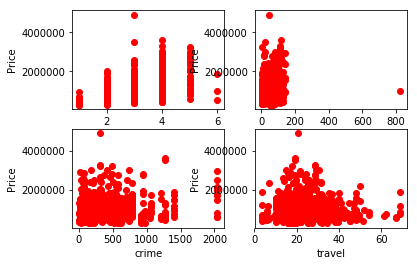

In [55]:
# plot 4 figure of distribution, the x axis is the one of predictor attributes, the y axis is the target which is price, the left up plot 
# is room against price, the left down plot is crime against price, the right up plot is age against price, and the right down plot is 
# travel min against price
plt.figure(12)

plt.subplot(221)
plt.plot(house['Rooms'], house['Price'], 'ro')
plt.xlabel("Rooms")
plt.ylabel("Price")

plt.subplot(222)
plt.plot(house['Age'], house['Price'], 'ro')
plt.xlabel("Age")
plt.ylabel("Price")

plt.subplot(223)
plt.plot(house['crime_C_average'], house['Price'], 'ro')
plt.xlabel("crime")
plt.ylabel("Price")
    
plt.subplot(224)
plt.plot(house['travel_min_to_CBD'], house['Price'], 'ro')
plt.xlabel("travel")
plt.ylabel("Price")

plt.show()

In [56]:
#Test the orginal data in linear regression, to determine the r-square value, make orginal model as control group.
x_train, x_test, y_train, y_test = train_test_split(house.loc[:,("Rooms", "Age", "crime_C_average", "travel_min_to_CBD")], house['Price'], random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) 
print("R-Spuare for orginal value model is", linear_model.score(x_test, y_test))

R-Spuare for orginal value model is 0.4237824442242575


### 2.1 Standardisation

In [57]:
#Adding the 4 standardiszation value comlumns
house_std = house.copy()
std_scale = preprocessing.StandardScaler().fit(house_std[['Rooms', 'Age','crime_C_average','travel_min_to_CBD']])
df_std =std_scale.transform(house_std[['Rooms', 'Age','crime_C_average','travel_min_to_CBD']])
house_std['scaled_rooms'] = df_std[:,0] 
house_std['scaled_age'] = df_std[:,1] 
house_std['scaled_crime'] = df_std[:,2] 
house_std['scaled_travel'] = df_std[:,3] 
house_std.head()

C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


ID      Price  Rooms    Age  travel_min_to_CBD  crime_C_average  \
0  ID524428873  1437000.0      3  109.0          19.214286              228   
1  ID455142191   791000.0      5   34.0          39.000000              159   
2  ID385314378   970000.0      3   38.0          48.181818               19   
3  ID205782381   760000.0      3   69.0          26.375000              154   
4  ID574190434   865000.0      3   13.0          19.923077               42   

   scaled_rooms  scaled_age  scaled_crime  scaled_travel  
0      0.043790    1.157747     -0.528164      -0.667914  
1      2.123805   -0.471008     -0.710287       1.183958  
2      0.043790   -0.384141     -1.079813       2.043344  
3      0.043790    0.289078     -0.723484       0.002303  
4      0.043790   -0.927060     -1.019105      -0.601574

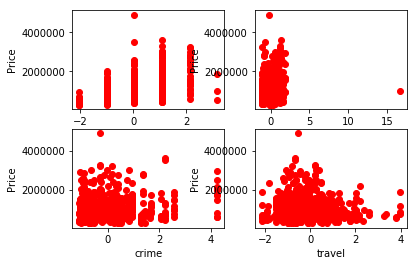

In [58]:
# plot 4 figure of distribution, the x axis is the one of predictor attributes, the y axis is the target which is price, the left up plot 
# is room against price, the left down plot is crime against price, the right up plot is age against price, and the right down plot is 
# travel min against price
plt.figure(12)

plt.subplot(221)
plt.plot(house_std['scaled_rooms'], house_std['Price'], 'ro')
plt.xlabel("Rooms")
plt.ylabel("Price")

plt.subplot(222)
plt.plot(house_std['scaled_age'], house_std['Price'], 'ro')
plt.xlabel("Age")
plt.ylabel("Price")

plt.subplot(223)
plt.plot(house_std['scaled_crime'], house_std['Price'], 'ro')
plt.xlabel("crime")
plt.ylabel("Price")
    
plt.subplot(224)
plt.plot(house_std['scaled_travel'], house_std['Price'], 'ro')
plt.xlabel("travel")
plt.ylabel("Price")

plt.show()

In [59]:
#Test the scaled data in linear regression, to determine the r-square value
x_train, x_test, y_train, y_test = train_test_split(house_std.loc[:,("scaled_rooms", "scaled_age", "scaled_crime", "scaled_travel")], house_std['Price'], random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) 
print("R-Spuare for Standardisation value model is", linear_model.score(x_test, y_test))

R-Spuare for Standardisation value model is 0.4237824442242576


### 2.2 min-max normalization

In [60]:
#Adding the 4 min-max normalization value comlumns
house_minmax = house.copy()
minmax_scale = preprocessing.MinMaxScaler().fit(house_minmax[['Rooms', 'Age','crime_C_average','travel_min_to_CBD']])
df_minmax =minmax_scale.transform(house_minmax[['Rooms', 'Age','crime_C_average','travel_min_to_CBD']])
house_minmax['scaled_rooms'] = df_minmax[:,0] 
house_minmax['scaled_age'] = df_minmax[:,1] 
house_minmax['scaled_crime'] = df_minmax[:,2] 
house_minmax['scaled_travel'] = df_minmax[:,3] 
house_minmax.head()

C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


ID      Price  Rooms    Age  travel_min_to_CBD  crime_C_average  \
0  ID524428873  1437000.0      3  109.0          19.214286              228   
1  ID455142191   791000.0      5   34.0          39.000000              159   
2  ID385314378   970000.0      3   38.0          48.181818               19   
3  ID205782381   760000.0      3   69.0          26.375000              154   
4  ID574190434   865000.0      3   13.0          19.923077               42   

   scaled_rooms  scaled_age  scaled_crime  scaled_travel  
0           0.4    0.130329      0.109475       0.241651  
1           0.8    0.038977      0.075601       0.544137  
2           0.4    0.043849      0.006873       0.684509  
3           0.4    0.081608      0.073147       0.351124  
4           0.4    0.013398      0.018164       0.252487

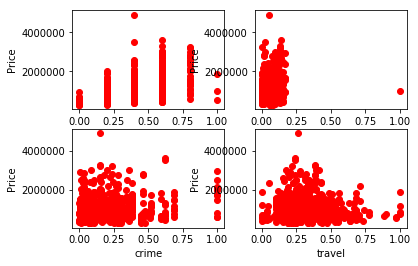

In [61]:
# plot 4 figure of distribution, the x axis is the one of predictor attributes, the y axis is the target which is price, the left up plot 
# is room against price, the left down plot is crime against price, the right up plot is age against price, and the right down plot is 
# travel min against price
plt.figure(12)

plt.subplot(221)
plt.plot(house_minmax['scaled_rooms'], house_minmax['Price'], 'ro')
plt.xlabel("Rooms")
plt.ylabel("Price")

plt.subplot(222)
plt.plot(house_minmax['scaled_age'], house_minmax['Price'], 'ro')
plt.xlabel("Age")
plt.ylabel("Price")

plt.subplot(223)
plt.plot(house_minmax['scaled_crime'], house_minmax['Price'], 'ro')
plt.xlabel("crime")
plt.ylabel("Price")
    
plt.subplot(224)
plt.plot(house_minmax['scaled_travel'], house_minmax['Price'], 'ro')
plt.xlabel("travel")
plt.ylabel("Price")

plt.show()

In [62]:
#Test the scaled data in linear regression, to determine the r-square value
x_train, x_test, y_train, y_test = train_test_split(house_minmax.loc[:,("scaled_rooms", "scaled_age", "scaled_crime", "scaled_travel")], house_minmax['Price'], random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) 
print("R-Spuare for Min_max value model is", linear_model.score(x_test, y_test))

R-Spuare for Min_max value model is 0.42378244422425726


### 2.3 log transformation

In [63]:
#Adding the log transformation value comlumns
house_log = house.copy()
house_log['scaled_rooms'] = None 
house_log['scaled_age'] = None  
house_log['scaled_crime'] = None  
house_log['scaled_travel'] = None 

for i in range(len(house_log)):
    house_log.loc[i,'scaled_rooms'] = math.log(house_log.loc[i,"Rooms"])
    house_log.loc[i,'scaled_age'] = math.log(house_log.loc[i,"Age"])
    house_log.loc[i,'scaled_crime'] = math.log(house_log.loc[i,"crime_C_average"])
    house_log.loc[i,'scaled_travel'] = math.log(house_log.loc[i,"travel_min_to_CBD"])

house_log.head()

ID      Price  Rooms    Age  travel_min_to_CBD  crime_C_average  \
0  ID524428873  1437000.0      3  109.0          19.214286              228   
1  ID455142191   791000.0      5   34.0          39.000000              159   
2  ID385314378   970000.0      3   38.0          48.181818               19   
3  ID205782381   760000.0      3   69.0          26.375000              154   
4  ID574190434   865000.0      3   13.0          19.923077               42   

  scaled_rooms scaled_age scaled_crime scaled_travel  
0      1.09861    4.69135      5.42935       2.95565  
1      1.60944    3.52636       5.0689       3.66356  
2      1.09861    3.63759      2.94444       3.87498  
3      1.09861    4.23411      5.03695       3.27242  
4      1.09861    2.56495      3.73767       2.99188

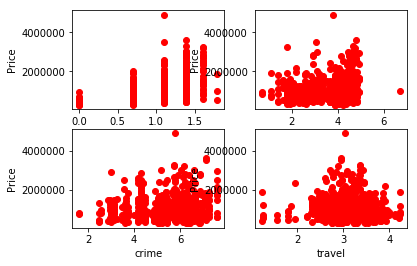

In [64]:
# plot 4 figure of distribution, the x axis is the one of predictor attributes, the y axis is the target which is price, the left up plot 
# is room against price, the left down plot is crime against price, the right up plot is age against price, and the right down plot is 
# travel min against price
plt.figure(12)
    
plt.subplot(221)
plt.plot(house_log['scaled_rooms'], house_log['Price'], 'ro')
plt.xlabel("Rooms")
plt.ylabel("Price")

plt.subplot(222)
plt.plot(house_log['scaled_age'], house_log['Price'], 'ro')
plt.xlabel("Age")
plt.ylabel("Price")

plt.subplot(223)
plt.plot(house_log['scaled_crime'], house_log['Price'], 'ro')
plt.xlabel("crime")
plt.ylabel("Price")
    
plt.subplot(224)
plt.plot(house_log['scaled_travel'], house_log['Price'], 'ro')
plt.xlabel("travel")
plt.ylabel("Price")

plt.show()

In [65]:
#Test the scaled data in linear regression, to determine the r-square value
x_train, x_test, y_train, y_test = train_test_split(house_log.loc[:,("scaled_rooms", "scaled_age", "scaled_crime", "scaled_travel")], house_log['Price'], random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) 
print("R-Spuare for Log value model is", linear_model.score(x_test, y_test))

R-Spuare for Log value model is 0.3987061765730303


### 2.4 power transformation

In [66]:
#Adding the power transformation value comlumns
house_power = house.copy()
house_power['scaled_rooms'] = None 
house_power['scaled_age'] = None  
house_power['scaled_crime'] = None  
house_power['scaled_travel'] = None 

for i in range(len(house_power)):
    house_power.loc[i,'scaled_rooms'] = math.pow(house_power.loc[i,"Rooms"],2)
    house_power.loc[i,'scaled_age'] = math.pow(house_power.loc[i,"Age"],2)
    house_power.loc[i,'scaled_crime'] = math.pow(house_power.loc[i,"crime_C_average"],2)
    house_power.loc[i,'scaled_travel'] = math.pow(house_power.loc[i,"travel_min_to_CBD"],2)

house_power.head()

ID      Price  Rooms    Age  travel_min_to_CBD  crime_C_average  \
0  ID524428873  1437000.0      3  109.0          19.214286              228   
1  ID455142191   791000.0      5   34.0          39.000000              159   
2  ID385314378   970000.0      3   38.0          48.181818               19   
3  ID205782381   760000.0      3   69.0          26.375000              154   
4  ID574190434   865000.0      3   13.0          19.923077               42   

   scaled_rooms  scaled_age  scaled_crime scaled_travel  
0             9       11881         51984       369.189  
1            25        1156         25281          1521  
2             9        1444           361       2321.49  
3             9        4761         23716       695.641  
4             9         169          1764       396.929

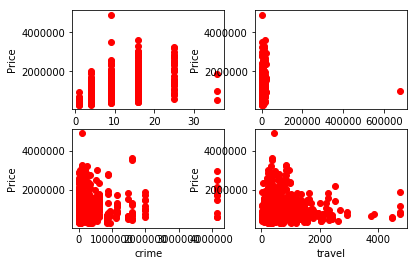

In [67]:
# plot 4 figure of distribution, the x axis is the one of predictor attributes, the y axis is the target which is price, the left up plot 
# is room against price, the left down plot is crime against price, the right up plot is age against price, and the right down plot is 
# travel min against price
plt.figure(12)
    
plt.subplot(221)
plt.plot(house_power['scaled_rooms'], house_power['Price'], 'ro')
plt.xlabel("Rooms")
plt.ylabel("Price")

plt.subplot(222)
plt.plot(house_power['scaled_age'], house_power['Price'], 'ro')
plt.xlabel("Age")
plt.ylabel("Price")

plt.subplot(223)
plt.plot(house_power['scaled_crime'], house_power['Price'], 'ro')
plt.xlabel("crime")
plt.ylabel("Price")
    
plt.subplot(224)
plt.plot(house_power['scaled_travel'], house_power['Price'], 'ro')
plt.xlabel("travel")
plt.ylabel("Price")

plt.show()

In [68]:
#Test the scaled data in linear regression, to determine the r-square value
x_train, x_test, y_train, y_test = train_test_split(house_power.loc[:,("scaled_rooms", "scaled_age", "scaled_crime", "scaled_travel")], house_power['Price'], random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) 
print("R-Spuare for Power value model is", linear_model.score(x_test, y_test))

R-Spuare for Power value model is 0.3396477284456786


### 2.5 root transformation

In [69]:
#Adding the root transformation value comlumns
house_root = house.copy()
house_root['scaled_rooms'] = None 
house_root['scaled_age'] = None  
house_root['scaled_crime'] = None  
house_root['scaled_travel'] = None 

for i in range(len(house_root)):
    house_root.loc[i,'scaled_rooms'] = math.sqrt(house_root.loc[i,"Rooms"])
    house_root.loc[i,'scaled_age'] = math.sqrt(house_root.loc[i,"Age"])
    house_root.loc[i,'scaled_crime'] = math.sqrt(house_root.loc[i,"crime_C_average"])
    house_root.loc[i,'scaled_travel'] = math.sqrt(house_root.loc[i,"travel_min_to_CBD"])

house_root.head()

ID      Price  Rooms    Age  travel_min_to_CBD  crime_C_average  \
0  ID524428873  1437000.0      3  109.0          19.214286              228   
1  ID455142191   791000.0      5   34.0          39.000000              159   
2  ID385314378   970000.0      3   38.0          48.181818               19   
3  ID205782381   760000.0      3   69.0          26.375000              154   
4  ID574190434   865000.0      3   13.0          19.923077               42   

  scaled_rooms scaled_age scaled_crime scaled_travel  
0      1.73205    10.4403      15.0997       4.38341  
1      2.23607    5.83095      12.6095         6.245  
2      1.73205    6.16441       4.3589       6.94131  
3      1.73205    8.30662      12.4097       5.13566  
4      1.73205    3.60555      6.48074       4.46353

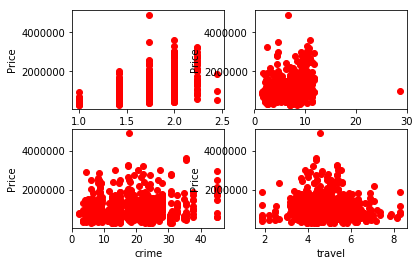

In [70]:
# plot 4 figure of distribution, the x axis is the one of predictor attributes, the y axis is the target which is price, the left up plot 
# is room against price, the left down plot is crime against price, the right up plot is age against price, and the right down plot is 
# travel min against price
plt.figure(12)
    
plt.subplot(221)
plt.plot(house_root['scaled_rooms'], house_root['Price'], 'ro')
plt.xlabel("Rooms")
plt.ylabel("Price")

plt.subplot(222)
plt.plot(house_root['scaled_age'], house_root['Price'], 'ro')
plt.xlabel("Age")
plt.ylabel("Price")

plt.subplot(223)
plt.plot(house_root['scaled_crime'], house_root['Price'], 'ro')
plt.xlabel("crime")
plt.ylabel("Price")
    
plt.subplot(224)
plt.plot(house_root['scaled_travel'], house_root['Price'], 'ro')
plt.xlabel("travel")
plt.ylabel("Price")

plt.show()

In [71]:
#Test the scaled data in linear regression, to determine the r-square value
x_train, x_test, y_train, y_test = train_test_split(house_root.loc[:,("scaled_rooms", "scaled_age", "scaled_crime", "scaled_travel")], house_root['Price'], random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) 
print("R-Spuare for Root value model is", linear_model.score(x_test, y_test))

R-Spuare for Root value model is 0.43812115593279555


### 2.6 Conclusion

- The plots did not show any big difference, so the plots can not be used to determine the effect of reshaping method
- Base on the R-square value for each model, the orginally model r-square value is 0.42. The standlization and min_max model have mostly same r-square with orginal model, so those two models did not impove the accurate of model. In power model, the r-square is even getting worse to  0.34, so the power model even make it worse. The log model did not improve in the r-sqaure, its r-sqaure value is 0.40 which is a little bit worse than original model. The root transformation model have best r-Square which is 0.438 which is slightly better than the original data. So the root transformation linear model best method in this data. 